## Final Project Submission

Please fill out:
* Student name: Alexander Claudino Daffara
* Student pace: full time
* Scheduled project review date/time: Jan 27th 2023
* Instructor name: Brendan Hutchinson
* Blog post URL: https://medium.com/@alexanderdaffara


IDEAS

 - box office profit compared to:
   - runtime
   - production budget
   - genre (per month/sesason?)
   - by rating (r, pg, ...)
   - male vs female lead role
   - movies released per region (looking at movie aka regions)
   - prominent role categories present (sound design, video etc.)
   - best directors and writers
   
 - rating compared to
   - box office

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
import calendar
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Importing all the Data

## imdb

In [4]:
%%bash 
sqlite3 data/im.db
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [2]:
conn = sqlite3.connect('data/im.db')
cursor = conn.cursor()

In [3]:
movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics """, conn)    # 146144  movie_id  (unique)
directors_df = pd.read_sql("""SELECT * FROM directors """, conn)          # 291174  movie_id  (140417 unique)
known_for_df = pd.read_sql("""SELECT * FROM known_for """, conn)          # 1638260 person_id 
movie_akas_df = pd.read_sql("""SELECT * FROM movie_akas """, conn)        # 331703  movie_id
movie_ratings_df = pd.read_sql("""SELECT * FROM movie_ratings """, conn)  # 73856   movie_id
persons_df = pd.read_sql("""SELECT * FROM persons """, conn)              # 606648  person_id
principals_df = pd.read_sql("""SELECT * FROM principals """, conn)        # 1028186 principals
writers_df = pd.read_sql("""SELECT * FROM writers """, conn)              # 255873  movie_id

In [10]:
# df_with_directors -> movie basics + directors (contains duplicates when a movie has multiple directors)
directors_df = directors_df.drop_duplicates()
df_with_directors = movie_basics_df.merge(directors_df, how="left", on='movie_id')
# merge with persons (losing info about person's occupations, birth and death year, due to too many nan)
df_with_directors = df_with_directors.merge(persons_df[['person_id','primary_name']], 
                                            on='person_id',
                                            how='left')
df_with_directors.rename(columns={'primary_name':'director_name','person_id':'director_id'}, inplace=True)
df_with_directors.drop(columns=['director_id'], inplace=True)
df_with_directors.drop_duplicates(inplace=True)
df_with_directors

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,director_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Harnam Singh Rawail
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Mani Kaul
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Orson Welles
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Hrishikesh Mukherjee
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Valeria Sarmiento
...,...,...,...,...,...,...,...
169257,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Ana Célia de Oliveira
169258,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Kanchan Nayak
169259,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
169260,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Angela Gurgel


In [11]:
# df_with_writers -> movie basics + writers (contains duplicates when a movie has multiple writers)
writers_df = writers_df.drop_duplicates()
df_with_writers = movie_basics_df.merge(writers_df, how="left", on='movie_id')
# merge with persons (losing info about person's occupations, birth and death year, due to too many nan)
df_with_writers = df_with_writers.merge(persons_df[['person_id','primary_name']], 
                                            on='person_id',
                                            how='left')
df_with_writers.rename(columns={'primary_name':'writer_name','person_id':'writer_id'}, inplace=True)
df_with_writers.drop(columns=['writer_id'], inplace=True)
df_with_writers.drop_duplicates(inplace=True)
df_with_writers

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,writer_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Abrar Alvi
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Mahasweta Devi
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Gulzar
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Anjana Rawail
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN
...,...,...,...,...,...,...,...
214230,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Ana Célia de Oliveira
214231,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Dr. Sudhir Nikam
214232,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
214233,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Vinicius Augusto Bozzo


## bom movie gross

In [305]:
# df_with_gross matches gross for all movies with the same name
# 'start_year' from movie_basics doesn't always match up with 'year' from gross_df
gross_df = pd.read_csv('data/bom.movie_gross.csv')
gross_df.dropna(subset=['foreign_gross','domestic_gross'], inplace=True)
gross_df['foreign_gross'] = gross_df['foreign_gross'].map(lambda x: float(x.replace(',',"")))
gross_df['total_gross'] = gross_df['foreign_gross'] + gross_df['domestic_gross']
# df_with_gross = movie_basics_df.merge(gross_df,
#                                       how='inner',
#                                       left_on='primary_title',
#                                       right_on='title')
gross_df

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


## TN movie budgets

In [4]:
budgets_df = pd.read_csv('data/tn.movie_budgets.csv')

budgets_df.drop(columns=['id'], inplace=True)
# convert dates and prices from strings to numbers
budgets_df['release_year'] = budgets_df['release_date'].map(lambda x: int(x[-4:]))
budgets_df['production_budget'] = budgets_df['production_budget'].map(lambda x: x.replace('$','').replace(',','')).astype(int)
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].map(lambda x: x.replace('$','').replace(',','')).astype(int)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].map(lambda x: x.replace('$','').replace(',','')).astype(int)
budgets_df['profit'] = budgets_df['worldwide_gross'] - budgets_df['production_budget']

# drop rows with no worldwide gross
budgets_df = budgets_df.loc[budgets_df['worldwide_gross'] != 0]

# merge with imdb
df_with_budgets = movie_basics_df.merge(budgets_df,
                                     how='inner',
                                     left_on=['primary_title','start_year'],
                                     suffixes=['_imdb','_budgets'],
                                     right_on=['movie','release_year'])

# modern_budgets_df since 2013
modern_budgets_df = budgets_df.loc[budgets_df['release_year'] >= 2013]

In [348]:
budgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,2351345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-200237650
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747
...,...,...,...,...,...,...,...
5775,"May 26, 2006",Cavite,7000,70071,71644,2006,64644
5776,"Dec 31, 2004",The Mongol King,7000,900,900,2004,-6100
5778,"Apr 2, 1999",Following,6000,48482,240495,1999,234495
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005,-3662


In [349]:
bom_tn_df = budgets_df.merge(gross_df,
                             how='left',
                             left_on=['movie','release_year'],
                             right_on=['title','year'],
                             suffixes=['_tn','_bom'])
bom_tn_df

,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,release_year,profit,title,studio,domestic_gross_bom,foreign_gross,year,total_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,2351345279,NaN,NaN,NaN,NaN,NaN,NaN
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011.0,1.045700e+09
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-200237650,NaN,NaN,NaN,NaN,NaN,NaN
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015.0,1.405400e+09
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,"May 26, 2006",Cavite,7000,70071,71644,2006,64644,NaN,NaN,NaN,NaN,NaN,NaN
5411,"Dec 31, 2004",The Mongol King,7000,900,900,2004,-6100,NaN,NaN,NaN,NaN,NaN,NaN
5412,"Apr 2, 1999",Following,6000,48482,240495,1999,234495,NaN,NaN,NaN,NaN,NaN,NaN
5413,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005,-3662,NaN,NaN,NaN,NaN,NaN,NaN


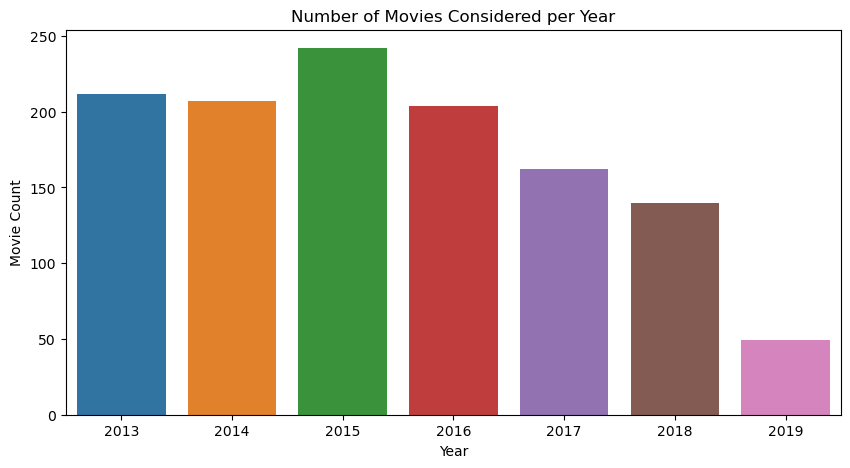

In [352]:
fig, ax = plt.subplots(figsize=(10,5))
data = modern_budgets_df.release_year.value_counts()
sns.barplot(x = data.index,
            y = data,
            ax=ax,
            errwidth=0).set(title='Number of Movies Considered per Year', ylabel='Movie Count', xlabel='Year')
plt.show()

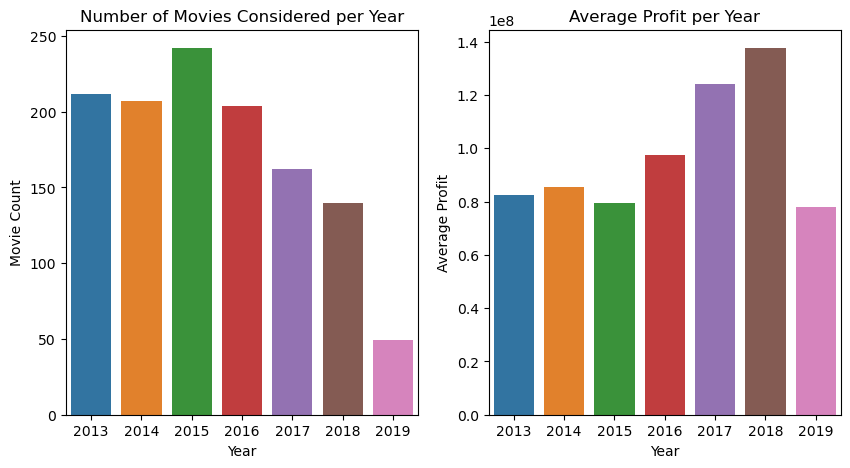

In [353]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
data = modern_budgets_df.release_year.value_counts()
sns.barplot(x = data.index,
            y = data,
            ax=ax1,
            errwidth=0).set(title='Number of Movies Considered per Year', ylabel='Movie Count', xlabel='Year')
data = modern_budgets_df.groupby('release_year').mean()
sns.barplot(x = data.index,
            y = 'profit',
            data=data,
            ax=ax2,
            errwidth=0).set(title='Average Profit per Year', ylabel='Average Profit', xlabel='Year')
plt.show()

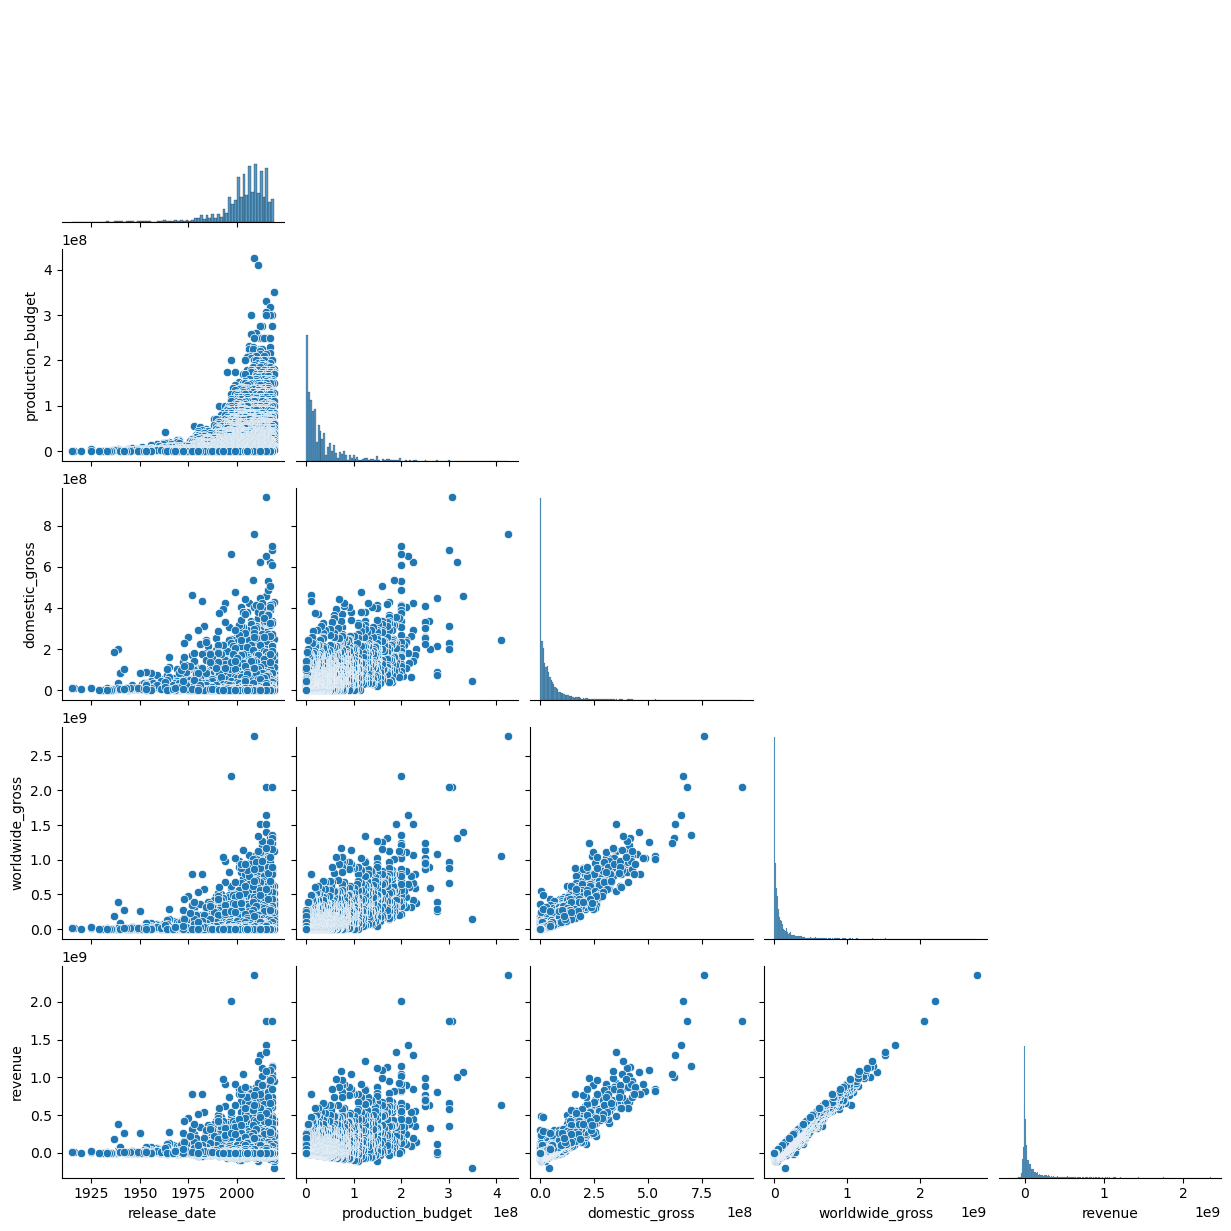

In [91]:
sns.pairplot(budgets_df, corner=True)

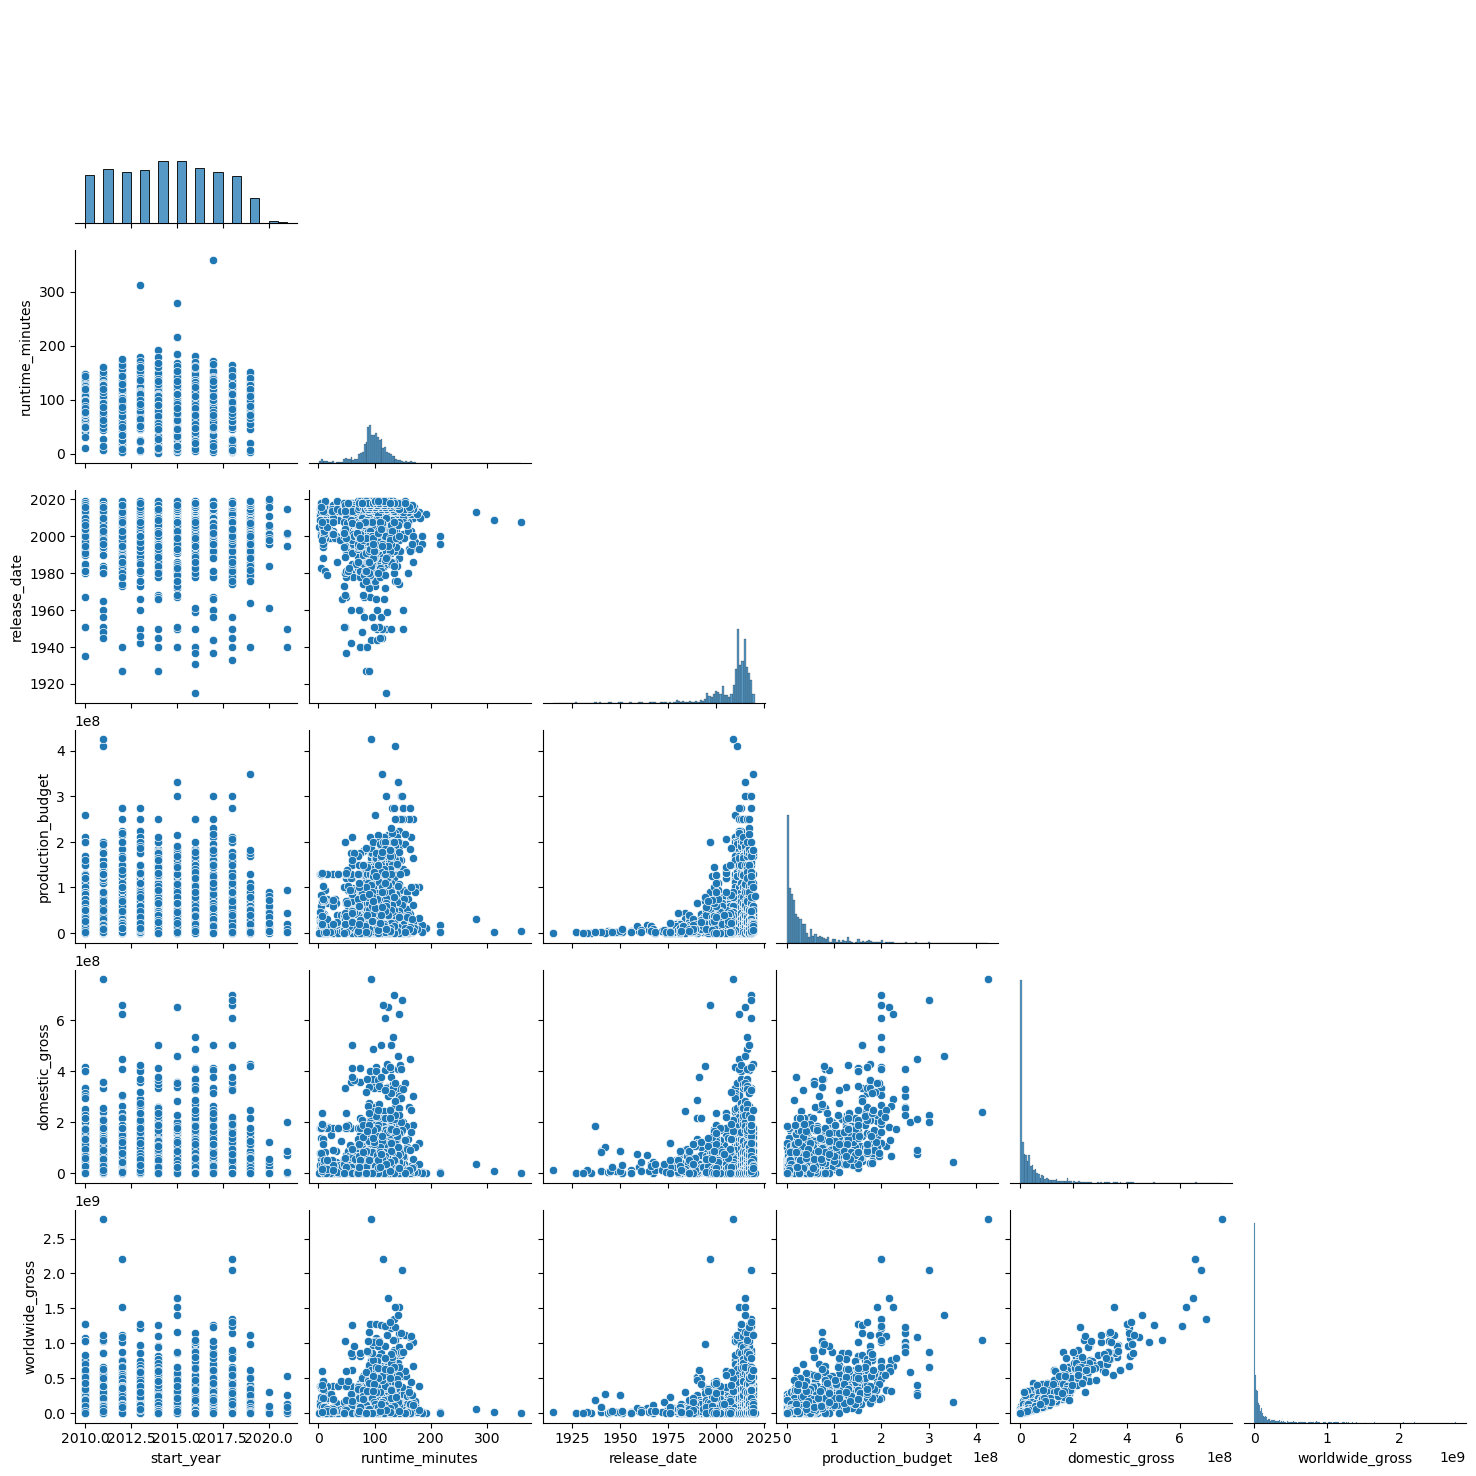

In [72]:
sns.pairplot(df_with_budgets, corner=True)

## rt movie info

In [146]:
rt_info_df = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')

def to_week_day(date):
    date = date.split()
    date[1] = date[1].replace(',','')
    month_id = list(calendar.month_abbr).index(date[0])
    return calendar.weekday(int(date[2]),month_id,int(date[1]))

def to_season(date):
    date = date.split()
    date[1] = date[1].replace(',','')
    month = date[0]
    day = int(date[1])
    if month in ('Jan', 'Feb', 'Mar'):
        season = 'winter'
    elif month in ('Apr', 'May', 'Jun'):
        season = 'spring'
    elif month in ('Jul', 'Aug', 'Sep'):
        season = 'summer'
    else:
        season = 'autumn'

    if (month == 'Mar') and (day > 19):
        season = 'spring'
    elif (month == 'Jun') and (day > 20):
        season = 'summer'
    elif (month == 'Sep') and (day > 21):
        season = 'autumn'
    elif (month == 'Dec') and (day > 20):
        season = 'winter'
    return season

# rt_cleaned_df disconsiders nan values, rt_cleaned_df_10 is only the 2010
rt_cleaned_df = rt_info_df.dropna()
rt_cleaned_df['box_office'] = rt_cleaned_df.box_office.map(lambda x : int(x.replace(',','')))
rt_cleaned_df['runtime'] = rt_cleaned_df.runtime.map(lambda x: int(x[:-8]))
rt_cleaned_df['theater_year'] = rt_cleaned_df.theater_date.map(lambda x : int(x[-4:]))
rt_cleaned_df['theater_weekday_id'] = \
    rt_cleaned_df.theater_date.map(to_week_day)
rt_cleaned_df['theater_weekday'] = rt_cleaned_df.theater_weekday_id.map({1:'tues',2:'wed',3:'thurs',4:'fri'})
rt_cleaned_df['theater_season'] = rt_cleaned_df.theater_date.map(to_season)
rt_cleaned_df_10 = rt_cleaned_df.loc[rt_cleaned_df['theater_year'] >= 2000]

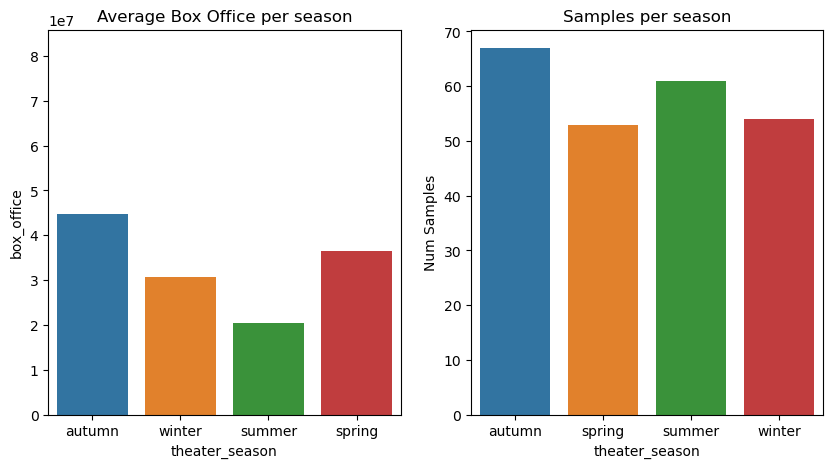

In [183]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.barplot(x = 'theater_season', 
            y='box_office', 
            data = rt_cleaned_df_10.sort_values(by='theater_weekday_id'), 
            ax=ax1, 
            errwidth=0).set(title='Average Box Office per season')
data = rt_cleaned_df.groupby('theater_season').count()
sns.barplot(x = data.index, 
            y = 'id',
            data = data,
            ax=ax2, 
            errwidth=0).set(title='Samples per season', ylabel='Num Samples')
plt.show()

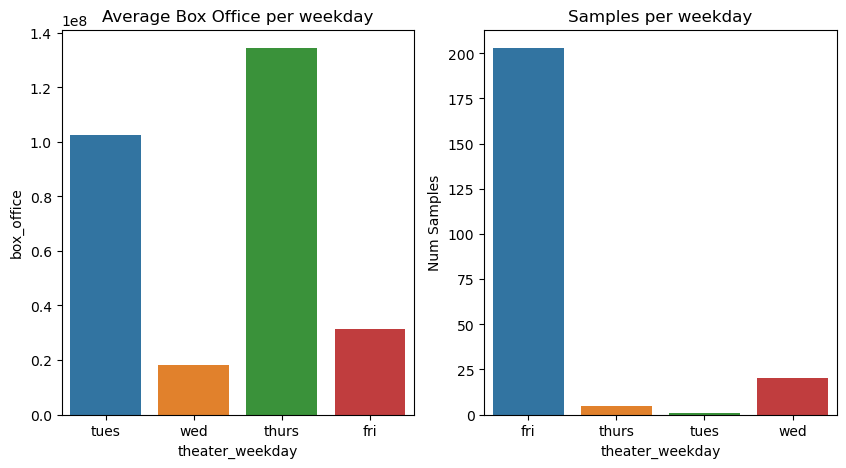

In [177]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.barplot(x = 'theater_weekday', 
            y='box_office', 
            data = rt_cleaned_df_10.sort_values(by='theater_weekday_id'), 
            ax=ax1, 
            errwidth=0).set(title='Average Box Office per weekday')
data = rt_cleaned_df.groupby('theater_weekday').count()
sns.barplot(x = data.index, 
            y = 'id',
            data = data,
            ax=ax2, 
            errwidth=0).set(title='Samples per weekday', ylabel='Num Samples')
plt.show()

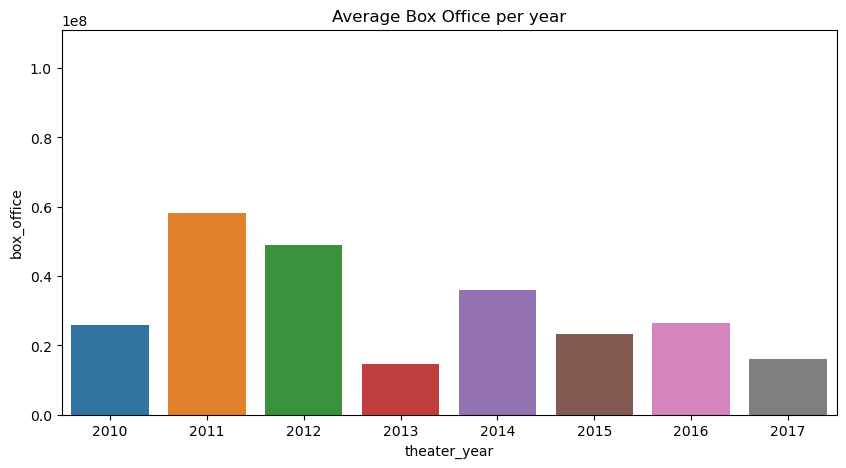

In [155]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x = 'theater_year', 
            y = 'box_office',
            data = rt_cleaned_df_10, 
            errwidth=0,
            ax=ax).set(title='Average Box Office per year')
plt.show()

## rt reviews

In [30]:
rt_reviews_df = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
rt_reviews_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


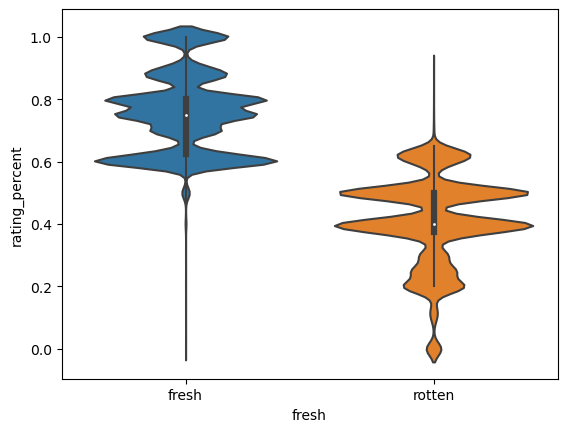

In [369]:
# ratings vs freshness
rt_reviews_df = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
rt_reviews_df.dropna(subset=['rating'], inplace=True)

def rating_map(x):
    if x[0].isnumeric() and len(x.split()) == 1:
        if '/' in x: return eval(x)
    return np.nan

rt_reviews_df['rating_percent'] = rt_reviews_df.rating.map(rating_map)
rt_reviews_df.dropna(subset=['rating_percent'],inplace=True)
rt_reviews_df.drop(index = rt_reviews_df.loc[rt_reviews_df['rating_percent'] > 1].index, inplace=True)
ax = sns.violinplot(x='fresh',y='rating_percent', data=rt_reviews_df)

# Cost vs Revenue

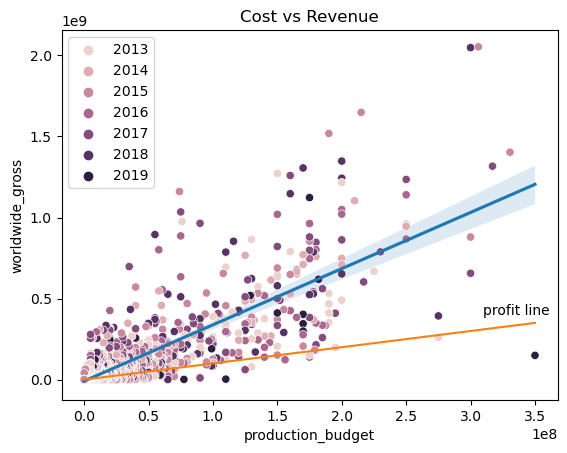

0.7924385564080456

In [389]:
fig, ax = plt.subplots()
sns.regplot(x='production_budget',
            y='worldwide_gross',
            scatter=False,
            data=modern_budgets_df,
            ax=ax)
sns.scatterplot(x='production_budget',
                y='worldwide_gross',
                hue='release_year',
                data=modern_budgets_df,
                ax=ax)
sns.lineplot(x=range(0,350000000, 10000),
             y=range(0, 350000000, 10000),
             ax=ax)
ax.set(title='Cost vs Revenue')
ax.text(310000000,400000000,'profit line')
plt.show()
modern_budgets_df.corr()['production_budget']['worldwide_gross']

# Profit vs runtime

In [5]:
# CONSIDER IMPUTING MEAN/MEDIAN for 31k out of 146k 
runtime_df = movie_basics_df.dropna(subset=['runtime_minutes'])
runtime_df = runtime_df.loc[runtime_df['runtime_minutes'] < 200]
profit_runtime_df = modern_budgets_df.merge(runtime_df[['primary_title','start_year','runtime_minutes']],
                                            how='inner',
                                            left_on=['movie','release_year'],
                                            right_on=['primary_title','start_year'])
profit_runtime_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,primary_title,start_year,runtime_minutes
0,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-200237650,Dark Phoenix,2019,113.0
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,Avengers: Age of Ultron,2015,141.0
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1748134200,Avengers: Infinity War,2018,149.0
3,"Nov 17, 2017",Justice League,300000000,229024295,655945209,2017,355945209,Justice League,2017,120.0
4,"Nov 6, 2015",Spectre,300000000,200074175,879620923,2015,579620923,Spectre,2015,148.0
...,...,...,...,...,...,...,...,...,...,...
914,"Jul 25, 2014",Happy Christmas,70000,30312,30312,2014,-39688,Happy Christmas,2014,82.0
915,"Jul 31, 2015",Counting,50000,8374,8374,2015,-41626,Counting,2015,111.0
916,"Jan 27, 2017",Emily,27000,3547,3547,2017,-23453,Emily,2017,83.0
917,"Sep 1, 2015",Exeter,25000,0,489792,2015,464792,Exeter,2015,91.0


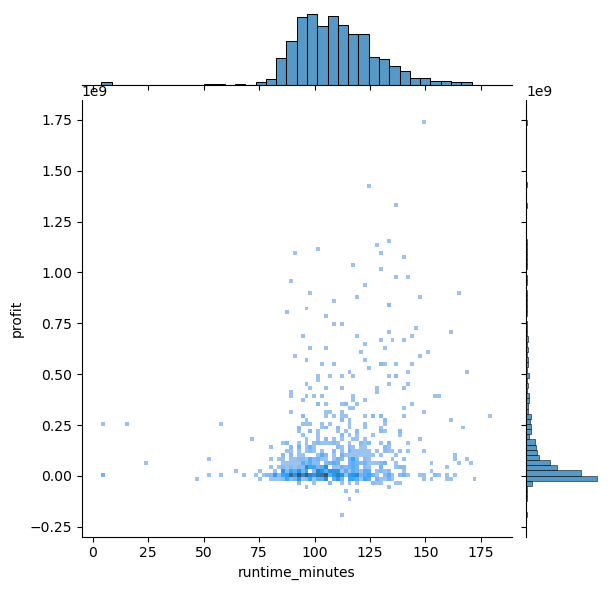

In [26]:
sns.jointplot(x='runtime_minutes',
              y='profit',
              data=profit_runtime_df,
              kind='hist',
              bins=100)
# sns.lineplot(x=range(0,200, 10),
#              y=[0] * 20,
             
#              ax=ax)
plt.show()

# Genre vs profit

In [143]:
# profit_genre_df has genres for each film split (exploded) into multiple rows
genre_df = movie_basics_df.dropna(subset=['genres'])
genre_df['genres'] = genre_df['genres'].map(lambda x: x.split(','))
genre_df = genre_df.explode('genres')
profit_genre_df = modern_budgets_df.merge(genre_df,
                                          how='inner',
                                          left_on=['movie','release_year'],
                                          right_on=['primary_title', 'start_year'],
                                          suffixes=['_budgets','_genres'])

profit_genre_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-200237650,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Action
1,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-200237650,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Adventure
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-200237650,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Sci-Fi
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,Action
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,"Jul 31, 2015",Counting,50000,8374,8374,2015,-41626,tt4462082,Counting,Counting,2015,111.0,Documentary
2393,"Jan 27, 2017",Emily,27000,3547,3547,2017,-23453,tt4393036,Emily,Emily,2017,83.0,Drama
2394,"Sep 1, 2015",Exeter,25000,0,489792,2015,464792,tt1945044,Exeter,Exeter,2015,91.0,Horror
2395,"Sep 1, 2015",Exeter,25000,0,489792,2015,464792,tt1945044,Exeter,Exeter,2015,91.0,Mystery


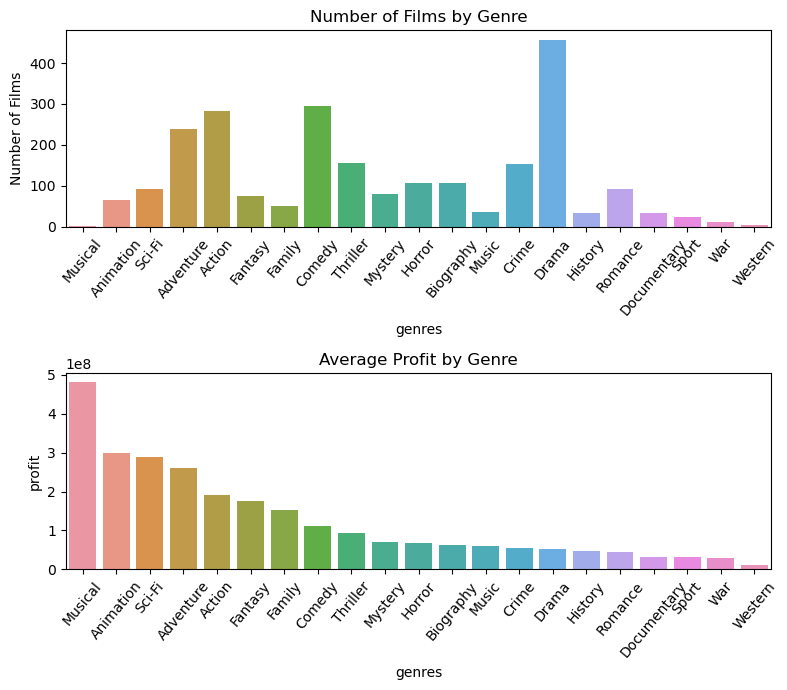

In [149]:
#data for profit per genre
grouped_profit_genre_df = profit_genre_df.groupby('genres').mean().sort_values(by='profit', ascending=False)

# data for counts per genre
grouped_count_profit_genre_df = profit_genre_df.groupby('genres').count()
genre_order_mapping = {k:v for k,v in zip(grouped_profit_genre_df.index,range(len(grouped_profit_genre_df)))}
grouped_count_profit_genre_df['genre_order'] = pd.Series(grouped_count_profit_genre_df.index).map(genre_order_mapping).to_list()
grouped_count_profit_genre_df = grouped_count_profit_genre_df.sort_values(by='genre_order')

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,7))
sns.barplot(x=grouped_count_profit_genre_df.index,
            y='profit',
            data=grouped_count_profit_genre_df,
            errwidth=0,
            ax=ax1).set(title='Number of Films by Genre', ylabel='Number of Films')
ax1.set_xticklabels(grouped_count_profit_genre_df.index, rotation=50)

sns.barplot(x=grouped_profit_genre_df.index,
            y='profit',
            data=grouped_profit_genre_df,
            errwidth=0,
            ax=ax2).set(title='Average Profit by Genre')

plt.xticks(rotation=50)
fig.tight_layout()
plt.show()

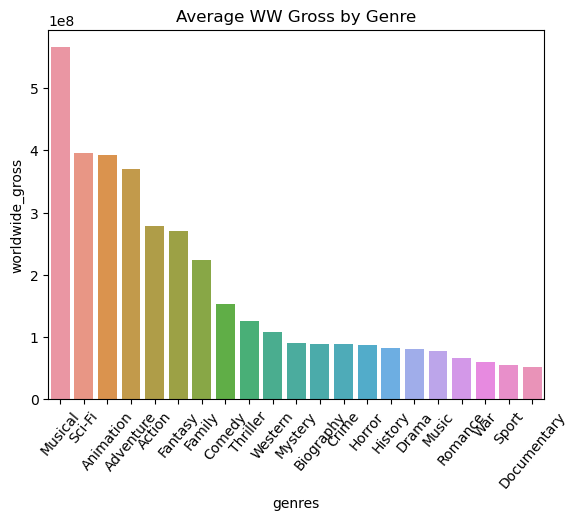

In [151]:
#data for ww gross per genre
grouped_profit_genre_df = profit_genre_df.groupby('genres').mean().sort_values(by='worldwide_gross', ascending=False)

sns.barplot(x=grouped_profit_genre_df.index,
            y='worldwide_gross',
            data=grouped_profit_genre_df,
            errwidth=0).set(title='Average WW Gross by Genre')

plt.xticks(rotation=50)
fig.tight_layout()
plt.show()

In [ ]:
# profit_genre_df has genres for each film split (exploded) into multiple rows
genreTuples_df = movie_basics_df.dropna(subset=['genres'])[['movie_id','primary_title','start_year','genres']]
genreTuples_df['genres'] = genreTuples_df['genres'].map(lambda x: x.split(','))
profit_genreTuples_df = modern_budgets_df.merge(genreTuples_df,
                                                how='inner',
                                                left_on=['movie','release_year'],
                                                right_on=['primary_title', 'start_year'])[['profit','genres']]
data_len = len(genreTuples_df.index)
for i in range(data_len):
    print(i)
    row = profit_genreTuples_df.iloc[i]
        
    genres = row['genres']
    if len(genres) == 3:
        new_row = {'profit':row['profit']}

        # genres[0,1]
        new_row['genres'] = [genres[0],genres[1]]
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)
        # genres[0,2]
        new_row['genres'] = [genres[0],genres[2]]
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)
        # genres[1,2]
        new_row['genres'] = [genres[1],genres[2]]
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)

        profit_genreTuples_df.drop(i, inplace=True)
        
profit_genreTuples_df


1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881


6430
6431
6432
6433
6434
6435
6436
6437
6438
6439
6440
6441
6442
6443
6444
6445
6446
6447
6448
6449
6450
6451
6452
6453
6454
6455
6456
6457
6458
6459
6460
6461
6462
6463
6464
6465
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6479
6480
6481
6482
6483
6484
6485
6486
6487
6488
6489
6490
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6502
6503
6504
6505
6506
6507
6508
6509
6510
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520
6521
6522
6523
6524
6525
6526
6527
6528
6529
6530
6531
6532
6533
6534
6535
6536
6537
6538
6539
6540
6541
6542
6543
6544
6545
6546
6547
6548
6549
6550
6551
6552
6553
6554
6555
6556
6557
6558
6559
6560
6561
6562
6563
6564
6565
6566
6567
6568
6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6579
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609
6610
6611
6612
6613
6614
6615
6616
6617
6618
6619
6620
6621
6622
6623
6624
6625
6626
6627
6628
6629


18058
18059
18060
18061
18062
18063
18064
18065
18066
18067
18068
18069
18070
18071
18072
18073
18074
18075
18076
18077
18078
18079
18080
18081
18082
18083
18084
18085
18086
18087
18088
18089
18090
18091
18092
18093
18094
18095
18096
18097
18098
18099
18100
18101
18102
18103
18104
18105
18106
18107
18108
18109
18110
18111
18112
18113
18114
18115
18116
18117
18118
18119
18120
18121
18122
18123
18124
18125
18126
18127
18128
18129
18130
18131
18132
18133
18134
18135
18136
18137
18138
18139
18140
18141
18142
18143
18144
18145
18146
18147
18148
18149
18150
18151
18152
18153
18154
18155
18156
18157
18158
18159
18160
18161
18162
18163
18164
18165
18166
18167
18168
18169
18170
18171
18172
18173
18174
18175
18176
18177
18178
18179
18180
18181
18182
18183
18184
18185
18186
18187
18188
18189
18190
18191
18192
18193
18194
18195
18196
18197
18198
18199
18200
18201
18202
18203
18204
18205
18206
18207
18208
18209
18210
18211
18212
18213
18214
18215
18216
18217
18218
18219
18220
18221
18222
18223
1822

31733
31734
31735
31736
31737
31738
31739
31740
31741
31742
31743
31744
31745
31746
31747
31748
31749
31750
31751
31752
31753
31754
31755
31756
31757
31758
31759
31760
31761
31762
31763
31764
31765
31766
31767
31768
31769
31770
31771
31772
31773
31774
31775
31776
31777
31778
31779
31780
31781
31782
31783
31784
31785
31786
31787
31788
31789
31790
31791
31792
31793
31794
31795
31796
31797
31798
31799
31800
31801
31802
31803
31804
31805
31806
31807
31808
31809
31810
31811
31812
31813
31814
31815
31816
31817
31818
31819
31820
31821
31822
31823
31824
31825
31826
31827
31828
31829
31830
31831
31832
31833
31834
31835
31836
31837
31838
31839
31840
31841
31842
31843
31844
31845
31846
31847
31848
31849
31850
31851
31852
31853
31854
31855
31856
31857
31858
31859
31860
31861
31862
31863
31864
31865
31866
31867
31868
31869
31870
31871
31872
31873
31874
31875
31876
31877
31878
31879
31880
31881
31882
31883
31884
31885
31886
31887
31888
31889
31890
31891
31892
31893
31894
31895
31896
31897
31898
3189

45429
45430
45431
45432
45433
45434
45435
45436
45437
45438
45439
45440
45441
45442
45443
45444
45445
45446
45447
45448
45449
45450
45451
45452
45453
45454
45455
45456
45457
45458
45459
45460
45461
45462
45463
45464
45465
45466
45467
45468
45469
45470
45471
45472
45473
45474
45475
45476
45477
45478
45479
45480
45481
45482
45483
45484
45485
45486
45487
45488
45489
45490
45491
45492
45493
45494
45495
45496
45497
45498
45499
45500
45501
45502
45503
45504
45505
45506
45507
45508
45509
45510
45511
45512
45513
45514
45515
45516
45517
45518
45519
45520
45521
45522
45523
45524
45525
45526
45527
45528
45529
45530
45531
45532
45533
45534
45535
45536
45537
45538
45539
45540
45541
45542
45543
45544
45545
45546
45547
45548
45549
45550
45551
45552
45553
45554
45555
45556
45557
45558
45559
45560
45561
45562
45563
45564
45565
45566
45567
45568
45569
45570
45571
45572
45573
45574
45575
45576
45577
45578
45579
45580
45581
45582
45583
45584
45585
45586
45587
45588
45589
45590
45591
45592
45593
45594
4559

57745
57746
57747
57748
57749
57750
57751
57752
57753
57754
57755
57756
57757
57758
57759
57760
57761
57762
57763
57764
57765
57766
57767
57768
57769
57770
57771
57772
57773
57774
57775
57776
57777
57778
57779
57780
57781
57782
57783
57784
57785
57786
57787
57788
57789
57790
57791
57792
57793
57794
57795
57796
57797
57798
57799
57800
57801
57802
57803
57804
57805
57806
57807
57808
57809
57810
57811
57812
57813
57814
57815
57816
57817
57818
57819
57820
57821
57822
57823
57824
57825
57826
57827
57828
57829
57830
57831
57832
57833
57834
57835
57836
57837
57838
57839
57840
57841
57842
57843
57844
57845
57846
57847
57848
57849
57850
57851
57852
57853
57854
57855
57856
57857
57858
57859
57860
57861
57862
57863
57864
57865
57866
57867
57868
57869
57870
57871
57872
57873
57874
57875
57876
57877
57878
57879
57880
57881
57882
57883
57884
57885
57886
57887
57888
57889
57890
57891
57892
57893
57894
57895
57896
57897
57898
57899
57900
57901
57902
57903
57904
57905
57906
57907
57908
57909
57910
5791